## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
!pip install tensorflow

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Datasets/train'
valid_path = 'Datasets/Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 65 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
3/3 [==============================] - 6s 2s/step - loss: 14.5239 - accuracy: 0.3231 - val_loss: 7.2745 - val_accuracy: 0.1552
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 4.2249 - accuracy: 0.3846 - val_loss: 4.6197 - val_accuracy: 0.5345
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 10.8784 - accuracy: 0.3538 - val_loss: 5.5338 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 10.5380 - accuracy: 0.4769 - val_loss: 4.0533 - val_accuracy: 0.5690
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 6.7272 - accuracy: 0.5077 - val_loss: 1.5868 - val_accuracy: 0.3793
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 2.3032 - accuracy: 0.3385 - val_loss: 7.0494 - val_accuracy: 0.1552
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 4.2886 - accuracy: 0.3538 - val_loss: 4.6574 - val_accuracy: 0.5172
Epoch 8/50
3/3 [======================

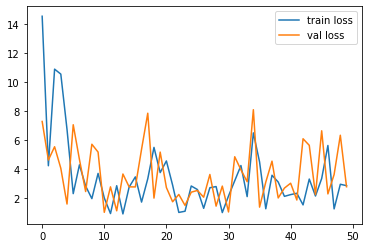

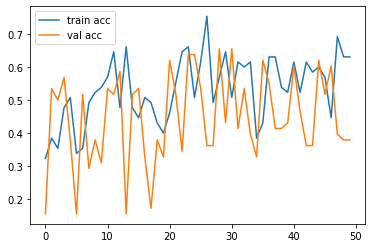

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:

y_pred = model.predict(test_set)


In [18]:
y_pred

array([[2.82640249e-01, 7.13184363e-06, 7.17352629e-01],
       [4.10564572e-01, 6.36840006e-03, 5.83067060e-01],
       [3.11482579e-01, 1.14959581e-02, 6.77021444e-01],
       [5.56704283e-01, 3.70328990e-03, 4.39592481e-01],
       [9.43795264e-01, 5.57748275e-03, 5.06272241e-02],
       [4.28041697e-01, 4.86339808e-01, 8.56185034e-02],
       [2.24692345e-01, 3.24163325e-02, 7.42891371e-01],
       [5.49459159e-01, 3.82906869e-02, 4.12250221e-01],
       [2.20354825e-01, 3.70624252e-06, 7.79641449e-01],
       [9.87496495e-01, 2.41932823e-04, 1.22615537e-02],
       [4.64772135e-01, 4.71696347e-01, 6.35315925e-02],
       [9.99959111e-01, 8.45967293e-07, 4.00987883e-05],
       [6.87542558e-01, 9.45835002e-03, 3.02999109e-01],
       [9.99224305e-01, 1.28848515e-05, 7.62780372e-04],
       [7.52383590e-01, 1.41728982e-01, 1.05887480e-01],
       [8.44534207e-03, 1.18091318e-03, 9.90373731e-01],
       [9.61979687e-01, 5.33674238e-03, 3.26836407e-02],
       [9.71375108e-01, 7.94531

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2], dtype=int64)

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [48]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

NameError: name 'img_data' is not defined

In [38]:
img=image.load_img('Datasets/Datasets/Test/audi/21.jpg',target_size=(224,224))



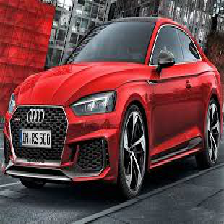

In [39]:
img

In [40]:
x=image.img_to_array(img)
x

array([[[194.,  57.,  65.],
        [184.,  53.,  59.],
        [175.,  49.,  53.],
        ...,
        [129., 139., 141.],
        [191., 201., 203.],
        [156., 166., 168.]],

       [[161.,  36.,  40.],
        [157.,  37.,  39.],
        [153.,  37.,  38.],
        ...,
        [124., 134., 136.],
        [122., 132., 134.],
        [ 78.,  88.,  90.]],

       [[161.,  36.,  40.],
        [157.,  37.,  39.],
        [153.,  37.,  38.],
        ...,
        [124., 134., 136.],
        [122., 132., 134.],
        [ 78.,  88.,  90.]],

       ...,

       [[ 89., 101., 101.],
        [ 85.,  97.,  97.],
        [ 75.,  87.,  87.],
        ...,
        [ 92.,  95., 100.],
        [ 79.,  82.,  87.],
        [113., 116., 121.]],

       [[ 89., 101., 101.],
        [ 85.,  97.,  97.],
        [ 75.,  87.,  87.],
        ...,
        [ 92.,  95., 100.],
        [ 79.,  82.,  87.],
        [113., 116., 121.]],

       [[ 89., 101., 101.],
        [ 85.,  97.,  97.],
        [ 75.,  

In [41]:
x.shape

(224, 224, 3)

In [42]:
x=x/255

In [43]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

array([[8.269461e-06, 5.745648e-07, 9.999912e-01]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data), axis=1)

In [46]:
a

array([2], dtype=int64)

In [28]:
a==1

array([False])

In [29]:
a

array([2], dtype=int64)